Tutorial on https://realpython.com/pandas-plot-python/

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
download_url = (
    "https://raw.githubusercontent.com/fivethirtyeight/"
    "data/master/college-majors/recent-grads.csv"
)

df = pd.read_csv(download_url)
type(df)

pandas.core.frame.DataFrame

In [16]:
pd.set_option("display.max.columns", None)
print(df.head())
df.describe()

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0    Engineering    0.120564           36      1976   
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineering    0.153037            3       648   
3   1123.0    135.0    Engineering    0.107313           16       758   
4  21239.0  11021.0    Engineering    0.341631          289     25694   

   Full_time  Part_time  Full_time_year_round  Unemployed  Unemployment_rate  \
0       1849        270       

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [23]:
#Looking at attributes

print(df.index)
print(df.columns)
print(type(df.columns))
print(df.columns[1:3])

RangeIndex(start=0, stop=173, step=1)
Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>
Index(['Major_code', 'Major'], dtype='object')


In [6]:
# Should match unemployment rate: arithmetic numpy calculations on columns 
unemployment_percentage = 100 * df["Unemployed"] / (df["Unemployed"] + df["Employed"] )

unemployment_percentage.head()

0     1.838053
1    11.724138
2     2.409639
3     5.012531
4     6.109771
dtype: float64

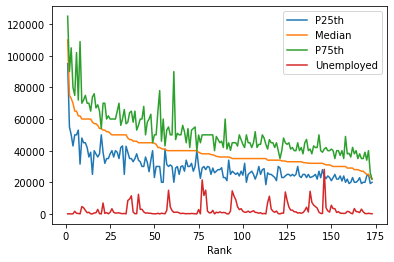

In [7]:
#P25th, Median, and P75th refer to income (see columns)


df.plot(x="Rank", y=["P25th", "Median", "P75th", "Unemployed"])
plt.show()

## The following may be interpreted from graph: 

- Median income goes down as rank goes down: expected 
- Large variation between percentiles for some majors

## Histograms

<AxesSubplot:ylabel='Frequency'>

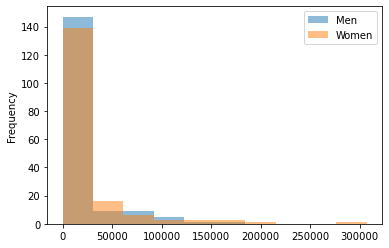

In [8]:
df[["Men", "Women"]].plot(kind = "hist", alpha = 0.5)

<AxesSubplot:ylabel='Frequency'>

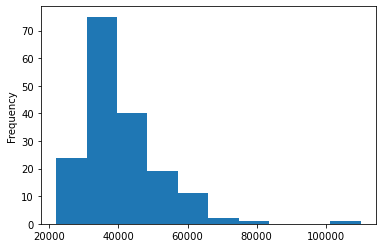

In [11]:
#investigating outliers in income 

df["Median"].plot(kind = "hist")

<AxesSubplot:xlabel='Major'>

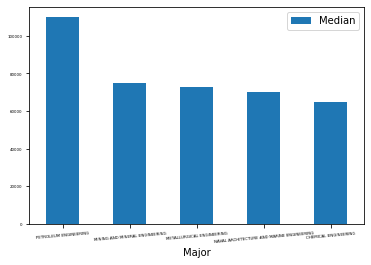

In [14]:
top_5 = df.sort_values(by="Median", ascending=False).head()
top_5.plot(x="Major", y="Median", kind="bar", rot=5, fontsize=4)

   Rank  Major_code                                      Major    Total  \
6     7        6202                          ACTUARIAL SCIENCE   3777.0   
7     8        5001                 ASTRONOMY AND ASTROPHYSICS   1792.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   
5     6        2418                        NUCLEAR ENGINEERING   2573.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
0     1        2419                      PETROLEUM ENGINEERING   2339.0   

       Men    Women     Major_category  ShareWomen  Sample_size  Employed  \
6   2110.0   1667.0           Business    0.441356           51      2912   
7    832.0    960.0  Physical Sciences    0.535714           10      1526   
4  21239.0  11021.0        Engineering    0.341631          289     25694   
5   2200.0    37

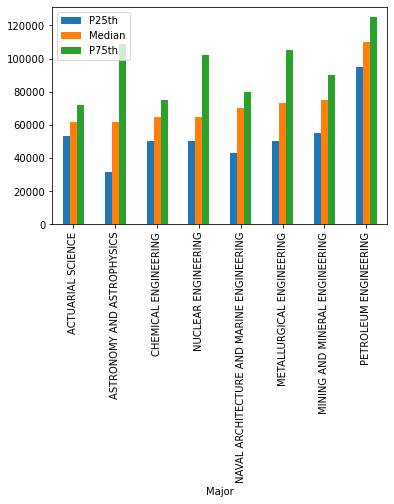

In [30]:
# Subset dataset according to row in column "median" and then sort according to value 

top_medians = df[df["Median"] > 60000].sort_values("Median")
top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind = "bar")
print(top_medians.head(n = 10))

## Conclusions 

 - Petrol analysis is the highest income major by far, choose that for $$$

# Correlation 

<AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>

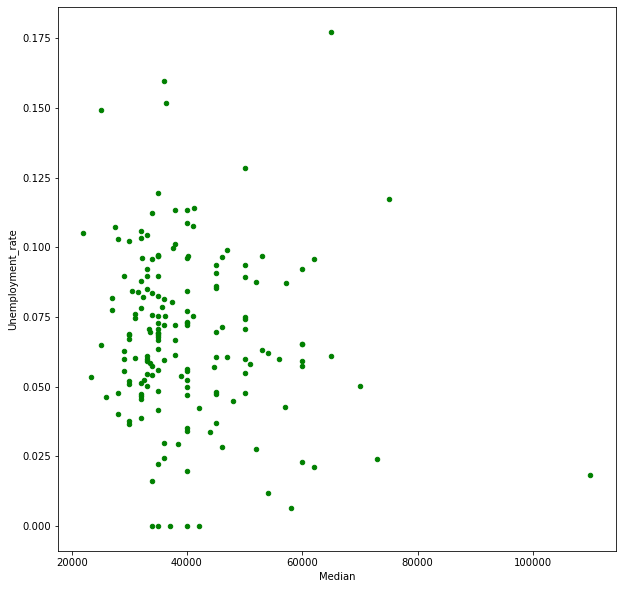

In [34]:
df.plot(x = "Median", y = "Unemployment_rate", kind = "scatter", color = "green", figsize = (10, 10))